<a href="https://colab.research.google.com/github/beniciowg/data-science-projects/blob/master/Gr%C3%A1ficos_Waffle_e_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando Gráficos Waffle e Wordcloud com dados do Airbnb

Ao realizar uma análise de dados passamos por várias etapas, desde a extração dos dados até a parte da representação gráfica para mostrar as informações e os insights descobertos. No entanto, passar a informação de maneira simples para uma compreensão mais rápida do que está sendo explicado não é uma tarefa trivial.

[Neste notebook](https://bit.ly/37ApQ6l) fizemos uma análise exploratória com um banco de dados resumido do Airbnb na cidade de Roma e conseguimos extrair alguns insights. **Agora, vou utilizar o banco de dados completo disponibilizado pelo Airbnb no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) para mostrar como podemos utilizar o gráfico do tipo *Waffle* para representar melhor graficamente nossas análises comparativas. Além disso, vamos criar uma *Wordcloud* (nuvem de palavras) para verificar quais são as palavras mais utilizadas pelos anfitriões no resumo para atrair hóspedes e mostrá-las de uma maneira de simples compreensão.**


<p align="center"><img alt="Coliseu" width="75%" src="https://upload.wikimedia.org/wikipedia/commons/d/d8/Colosseum_in_Rome-April_2007-1-_copie_2B.jpg"></p>

## Instalação e importação das bibliotecas e dados

O primeiro passo é a importação das bibliotecas que tornarão possível criar os gráficos que desejamos. Neste caso, utilizaremos as bibliotecas `pywaffle` e `wordcloud`. Elas podem ser instaladas com `pip install pywaffle` e `pip install wordcloud`, e também com `conda install pywaffle` e `conda install wordcloud`. Depois é só importar os dados direto do site do Airbnb e estamos prontos pra começar!

In [ ]:
# acessando o terminal do colab e instalando o pywaffle e o wordcloud
!pip install pywaffle -q
!pip install wordcloud -q

     |████████████████████████████████| 532kB 2.7MB/s 


In [ ]:
# importando as bibliotecas básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# importando o dataset completo direto do site
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2020-05-15/data/listings.csv.gz");

# imprimindo a quantidade de variáveis e entradas de nosso dataset e as primeiras 5 linhas
print(f'Variáveis: {df.shape[1]}');
print(f'Entradas: {df.shape[0]}');

df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Variáveis: 106
Entradas: 30895


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2737,https://www.airbnb.com/rooms/2737,20200515045818,2020-05-18,"Single room in cozy, clean flat.",10 min by bus you can get to Piazza Venezia or...,"Very comfortable, clean and cozy flat in the n...",10 min by bus you can get to Piazza Venezia or...,none,It used to be an industrial area until late 80...,There are several excellent and very famous pa...,10 min by bus you can get to Piazza Venezia or...,"You can cook and prepare your meals, do your l...",I would be more than happy to help you how to...,"Sorry, no smokers and no pets. We use indoor ...",NaN,NaN,https://a0.muscache.com/im/pictures/41225252/e...,NaN,3047,https://www.airbnb.com/users/show/3047,Elif,2008-09-18,"Rome, Lazio, Italy",I am a Turkish-Italian who was born in Istanbu...,within a few hours,100%,13%,f,https://a0.muscache.com/im/users/3047/profile_...,https://a0.muscache.com/im/users/3047/profile_...,Testaccio,5.0,5.0,"['email', 'phone', 'reviews']",t,f,"Rome, Lazio, Italy",Ostiense,VIII Appia Antica,...,$20.00,60,90,60,60,90,90,60.0,90.0,12 months ago,t,30,60,90,365,2020-05-18,7,0,2014-12-26,2015-05-28,96.0,9.0,9.0,10.0,10.0,9.0,9.0,t,NaN,NaN,f,f,strict_new,f,f,5,0,5,0,0.11
1,2903,https://www.airbnb.com/rooms/2903,20200515045818,2020-05-17,Stay a night in Calisto6 B&B Rome,NaN,"Calisto6 B&B is an Italian city style ""bed and...","Calisto6 B&B is an Italian city style ""bed and...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/6315103/3f...,NaN,3280,https://www.airbnb.com/users/show/3280,Andrea,2008-09-28,"Rome, Lazio, Italy",NaN,NaN,NaN,33%,f,https://a0.muscache.com/im/users/3280/profile_...,https://a0.muscache.com/im/users/3280/profile_...,Trastevere,3.0,3.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Rome, Lazio, Italy",Trastevere,I Centro Storico,...,$28.00,1,730,1,1,730,730,1.0,730.0,18 months ago,t,30,60,90,365,2020-05-17,55,0,2008-11-16,2017-10-31,86.0,9.0,9.0,9.0,9.0,9.0,9.0,t,NaN,NaN,f,f,strict_new,f,f,3,0,3,0,0.39
2,3079,https://www.airbnb.com/rooms/3079,20200515045818,2020-05-25,Cozy apartment (2-4)with Colisseum view,With the view of the Colisseum from the front ...,The apartment is located in one of Rome's most...,With the view of the Colisseum from the front ...,none,Monti neighborhood is one of the best areas in...,Dear guest. if you want I'm able to organize p...,Convenient bus routes and subway line B Cavour...,The guests have a private kitchenette and (URL...,My housekeepers and I we're always take care o...,"Dear guests,please in the toilet thrown only ...",NaN,NaN,https://a0.muscache.com/im/

Podemos notar que esse dataset é muito maior que o dataset resumido que havíamos utilizado no outro *notebook*, contendo 106 colunas. Para construir nossos gráficos iremos utilizar apenas as colunas `room_type` e `summary`.

## Gráfico Waffle

Para construir nosso gráfico tipo *Waffle* vamos utilizar a variável `room_type` e verificar quais categorias de imóveis são mais alugadas no Airbnb em Roma. Para isso, devemos criar um objeto `figure` do `matplotlib` e passar `Waffle` como argumento no `FigureClass`.

In [ ]:
# primeiro vamos checar se a coluna room_type possui valores nulos
df.room_type.isnull().sum()

0

Podemos verificar que a coluna `room_type` não possui valores nulos, não sendo necessário excluir linhas ou preencher valores.

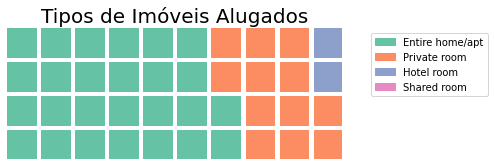

In [ ]:
# importando a biblioteca pywaffle
from pywaffle import Waffle

# criando a variável room_types com a contagem de valor por tipo de imóvel
room_types = df['room_type'].value_counts()

# criando a figura do tipo Waffle, passando os valores e ajustando parâmetros
fig = plt.figure(FigureClass=Waffle,
                 rows=4, columns=10,
                 values=list(room_types.values),
                 labels=list(room_types.index),
                 title={'label': 'Tipos de Imóveis Alugados',
                        'loc': 'center',
                        'fontdict': {'fontsize': 20}},
                 legend={'loc': 'upper right',
                         'bbox_to_anchor': (1.45, 1)})

# desativando o ajuste automático dos parâmetros da figura para evitar sobreposição dos elementos
fig.set_tight_layout(False)

plt.show()

É possível notar que apartamentos e casas inteiras são o tipo de imóvel mais alugado pelo Airbnb em Roma, seguido por quartos privativos. A quantidade de quartos compartilhados é tão pequena que nem aparece no gráfico.

Podemos modificar mais ainda nosso gráfico *Waffle* alterando os ícones, as cores e até colocando a porcentagem na legenda para facilitar a compreensão.

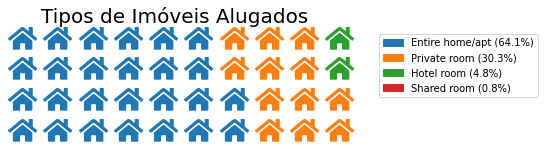

In [ ]:
# criando a variável com o percentual e arredondando para uma casa decimal
percentage = round(((df['room_type'].value_counts() / df.shape[0])*100), 1)

#criando uma nova figura Waffle e alterando os parâmetros desejados
fig = plt.figure(FigureClass=Waffle,
                 values=list(room_types.values),
                 rows=4, columns=10,
                 labels=list(room_types.index),
                 cmap_name='tab10',
                 title={'label': 'Tipos de Imóveis Alugados',
                        'loc': 'center',
                        'fontdict': {'fontsize': 20}},
                 legend={'labels': ["{0} ({1}%)".format(k, v) for k, v in percentage.items()],
                         'loc': 'upper right',
                         'bbox_to_anchor': (1.6, 1)},
                 icons='home',
                 interval_ratio_x=1,
                 interval_ratio_y=.75)

# desativando o ajuste automático dos parâmetros da figura para evitar sobreposição dos elementos
fig.set_tight_layout(False)

plt.show()

Pronto! Agora nosso gráfico *Waffle* está customizado. Para descobrir mais opções de customização, [acesse a documentação do pywaffle](https://pywaffle.readthedocs.io/en/latest/index.html).

## Wordcloud

Após construir o gráfico *Waffle*, vamos utilizar a coluna `summary` para identificar quais são as palavras mais utilizadas pelos anfitriões para descrever seus imóveis. Para construir nossa *Wordcloud* será necessário criar uma lista de palavras a serem desconsideradas (*stopwords*) e criar uma imagem com a *wordcloud*.

Vamos começar verificando por valores nulos e os excluindo.

In [ ]:
# verificando a quantidade de valores nulos
df.summary.isnull().sum()

1120

In [ ]:
# criando um novo dataset somente com a coluna summary e retirando as entradas com valores nulos
summary = df.dropna(axis=0, subset=['summary'])['summary']

In [ ]:
# concatenando todas as strings como se fossem um só texto para formar a wordcloud
all_summary = " ".join(s for s in summary)

# imprimindo o número de palavras
print(f'Quantidade de Palavras: {len(all_summary)}')

Quantidade de Palavras: 10117015


Vimos que a coluna `summary` possuía 1120 valores nulos que foram deletados por não nos servir para a análise. Além disso, verificamos que temos mais de 10 milhões de palavras a serem analisadas para formar nossa nuvem de palavras.
Agora, vamos importar a biblioteca `wordcloud` e criar a imagem.

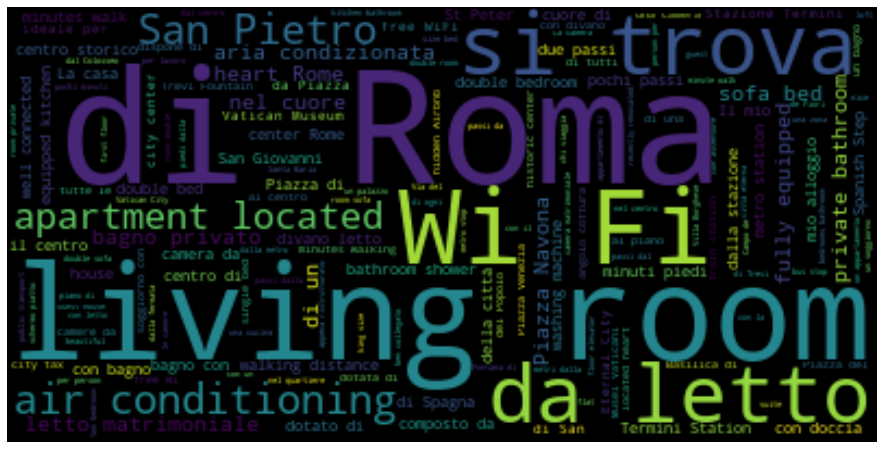

In [ ]:
# importando a biblioteca wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# criando a lista de stopwords
stopwords = set(STOPWORDS)

# criando a imagem com wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black').generate(all_summary)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

Nossa *Wordcloud* foi criada, mas podemos ver que há algumas palavras em italiano desnecessárias que atrapalham a visualização e, também, a resolução está baixa. Vamos atualizar a lista de *stopwords* e melhorar a qualidade de nossa imagem.

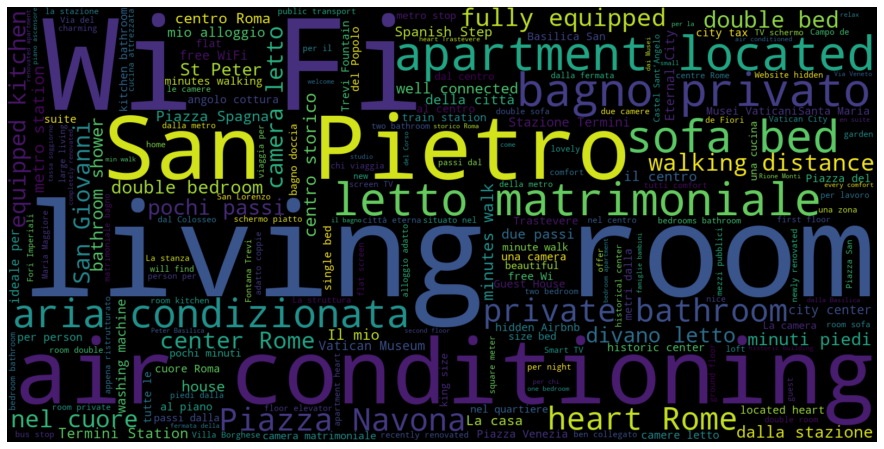

In [ ]:
# atualizando a lista de stopwords com algumas palavras em italiano
stopwords.update(['di', 'da', 'un', 'si', 'con'])

# criando uma nova wordcloud com as stopwords atualizadas e ajustando a qualidade da imagem
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600, height=800).generate(all_summary)

fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

Pronto! Nossa *wordcloud* está muito melhor agora!

Como ninguém vive sem internet hoje em dia, vemos que os anfitriões dão destaque para esse item. Além disso, gostam de destacar que os imóveis possuem sala de estar e quem já esteve em Roma no verão sabe que a cidade é muito quente, fazendo sentido ar condicionado aparecer em destaque tanto em inglês quanto em italiano.

Alguns pontos turísticos também são destacados como San Pietro que dá nome a principal praça e basílica do Vaticano e a Piazza Navona, uma das praças mais belas da cidade que fica próxima ao famoso Panteão de Roma.

Para estilizar mais nossa *wordcloud*, vamos formá-la no formato da imagem do Coliseu, um dos pontos turísticos mais famosos de Roma.

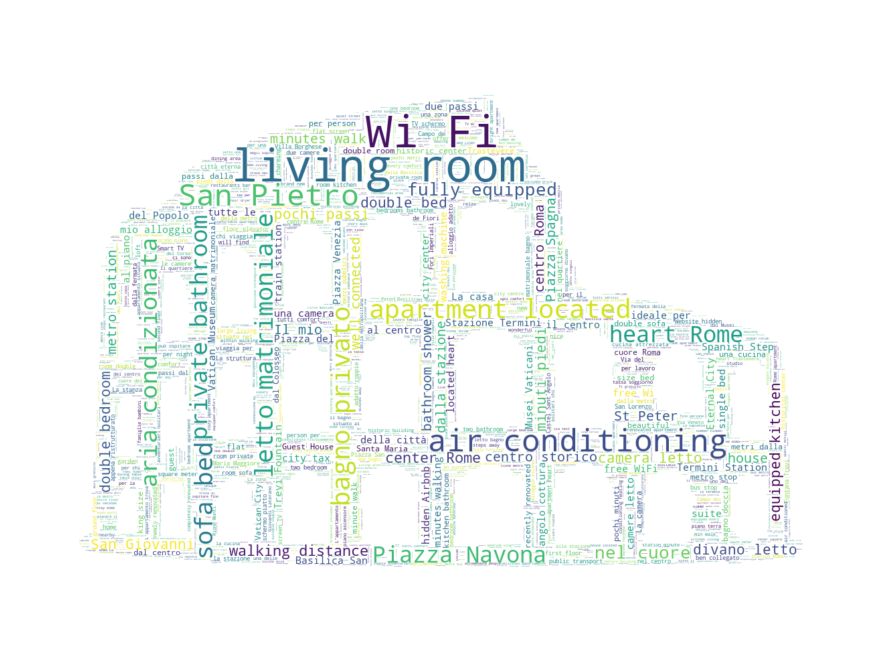

In [ ]:
# importando a biblioteca PIL para manipulação de imagens em Python
from PIL import Image

# formando um numpy array para criar a máscara da imagem que usaremos para formar nossa wordcloud
rome_mask = np.array(Image.open("/content/drive/My Drive/Colab Notebooks/Projetos/coliseu2.jpg"))

# criando a wordcloud e passando a máscara da imagem como parâmetro
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      mask=rome_mask,
                      min_font_size=1, max_font_size=200,
                      max_words=2000,
                      width=1300, height=975).generate(all_summary)

fig, ax = plt.subplots(figsize=(16,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.show()

Vale ressaltar que a imagem utilizada para criar a nuvem de palavras deve estar em preto e branco. As partes escuras da imagem serão preenchidas pelas palavras.

Podemos salvar nossa nuvem de palavras em formato PNG.

In [ ]:
# gerando uma imagem no formato PNG
wordcloud.to_file("airbnb_summary_wordcloud.png");

# Conclusão

Vimos que com algumas linhas código conseguimos construir visualizações mais intuitivas e informativas para passar a mensagem que desejamos. O gráfico *Waffle* pode ser utilizado para substituir o gráfico de pizza, por exemplo, que costuma gerar dificuldade em análises comparativas.

Já a *Wordcloud* (nuvem de palavras) é uma ótima opção quando estamos lidando com dados em texto e pode ser bastante estilizado. Agora você tem mais opções quando tiver criando suas análises e apresentações baseadas em dados.